In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

2024-03-18 19:44:43.339647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('datasets/supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# searching for null (empty) values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

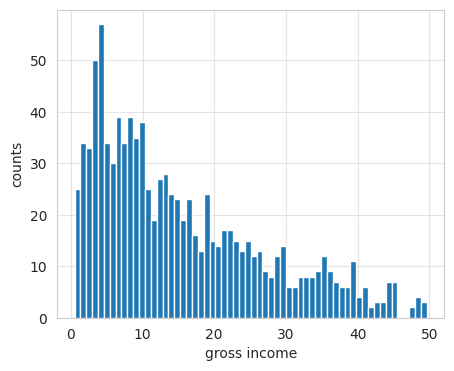

In [4]:
plt.figure(figsize=(5, 4))
plt.hist(df[["gross income"]], bins=60)
plt.xlabel("gross income")
plt.ylabel("counts")

plt.grid(alpha=0.5)
plt.show()

In [5]:
df['gross margin percentage'].value_counts()

gross margin percentage
4.761905    1000
Name: count, dtype: int64

In [6]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [7]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [8]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [9]:
genders = df['Gender'].value_counts()
genders

Gender
Female    501
Male      499
Name: count, dtype: int64

In [10]:
products = df['Product line'].value_counts()
products

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [11]:
products = list(products.keys())

In [12]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [13]:
Male_nProducts   = [df.query(f"Gender == 'Male'   and `Product line` == '{product}'").Gender.count() for product in products]
Female_nProducts = [df.query(f"Gender == 'Female' and `Product line` == '{product}'").Gender.count() for product in products]

In [14]:
Male_Total   = [round(df.query(f"Gender == 'Male'   and `Product line` == '{product}'").Total.sum(), 1) for product in products]
Female_Total = [round(df.query(f"Gender == 'Female' and `Product line` == '{product}'").Total.sum(), 1) for product in products]

In [15]:
nProducts = [df.query(f"`Product line` == '{product}'").Gender.count() for product in products]
Total = [round(df.query(f"`Product line` == '{product}'").Total.sum(), 1) for product in products]

In [16]:
Total_sorted = sorted(Total)
indices = [Total.index(x) for x in Total_sorted]
indices

[5, 4, 0, 2, 3, 1]

In [17]:
Male_nProducts_sorted   = [Male_nProducts[i] for i in indices]
Female_nProducts_sorted = [Female_nProducts[i] for i in indices]

Male_Total_sorted   = [Male_Total[i] for i in indices]
Female_Total_sorted = [Female_Total[i] for i in indices]

nProducts_sorted = [nProducts[i] for i in indices]

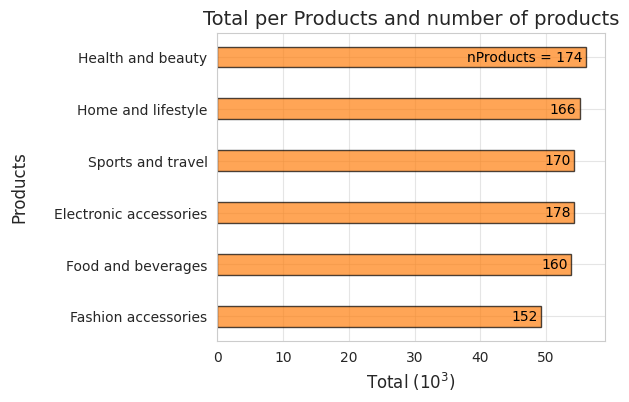

In [18]:
# figure including both genders
Total_resized = [i/1e3 for i in Total_sorted]

# Create the plot
plt.figure(figsize=(5, 4))
plt.barh(range(len(products)), Total_resized, color='tab:orange', alpha=0.7, height=0.4, edgecolor='black')

# Add numbers inside the bars
for index, value in enumerate(nProducts_sorted):
    if value == nProducts_sorted[-1]: text = f"nProducts = {value}"
    else: text = value
    plt.text(Total_resized[index]*0.99, index, text, color='black', ha='right', va='center')

# Customize the plot
plt.xlabel('Total ($10^{3}$)', fontsize=12)
plt.ylabel('Products\n', fontsize=12)
plt.yticks(range(len(products)), products)
plt.title('Total per Products and number of products', fontsize=14)

# Show plot
plt.grid(alpha=0.5)
plt.show()

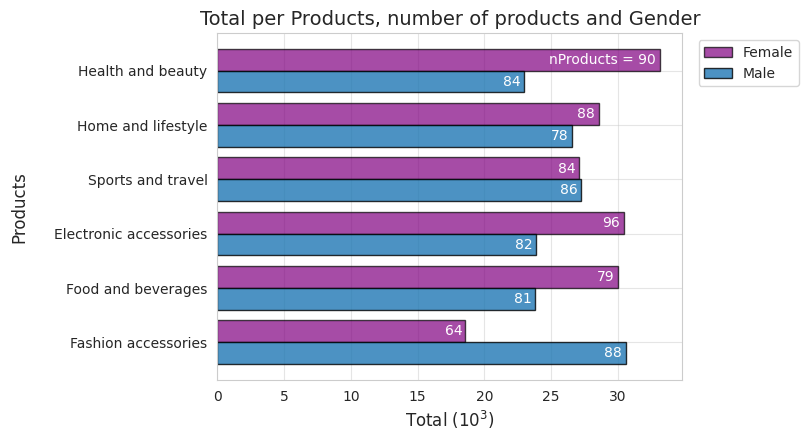

In [19]:
# Calculate the positions for bars
bar_width = 0.4
r1 = range(len(products))
r2 = [x + bar_width for x in r1]

Female_Total_resized = [i/1e3 for i in Female_Total_sorted]
Male_Total_resized = [i/1e3 for i in Male_Total_sorted]

# Create the plot
plt.figure(figsize=(6, 4.5))

plt.barh(r2, Female_Total_resized, color='purple', alpha=0.7, height=bar_width, edgecolor='black', label='Female')
plt.barh(r1, Male_Total_resized, color='tab:blue', alpha=0.8, height=bar_width, edgecolor='black', label='Male')

# Add numbers inside the bars
for index, value in enumerate(Female_nProducts_sorted):
    if value == Female_nProducts_sorted[-1]: text = f"nProducts = {value}"
    else: text = value
    plt.text(Female_Total_resized[index]*0.99, index + bar_width, text, color='white', ha='right', va='center')

for index, value in enumerate(Male_nProducts_sorted):
    plt.text(Male_Total_resized[index]*0.99, index, value, color='white', ha='right', va='center')

# Customize the plot
plt.xlabel('Total ($10^{3}$)', fontsize=12)
plt.ylabel('Products\n', fontsize=12)
plt.yticks([r + bar_width / 2 for r in range(len(products))], products)
plt.title('Total per Products, number of products and Gender', fontsize=14)

# Show plot
plt.grid(alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

In [20]:
df_ = df.groupby(by='Product line')['gross income'].sum()
df_ = df_.sort_values(ascending=False)
df_ # This is actually a pandas series

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

In [21]:
dates = pd.to_datetime(df['Date'])
dates

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

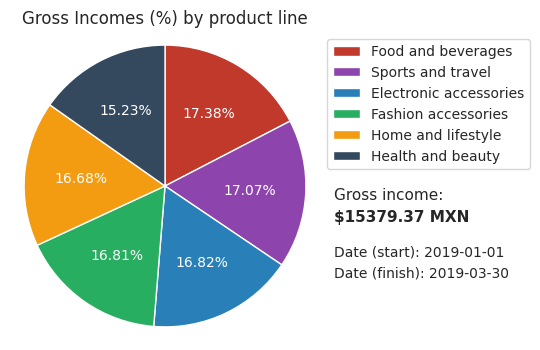

In [22]:
labels = df_.index
sizes  = df_.values

# colors can be got from the page: https://htmlcolorcodes.com/
colors = ['#C0392B', '#8E44AD', '#2980B9', '#27AE60', '#F39C12', '#34495E']

# Plot
plt.figure(figsize=(4,4))
patches, _, autotexts = plt.pie(sizes, labels=None, autopct='%1.2f%%', shadow=False, startangle=90, colors=colors,
                                counterclock=False, textprops={'fontsize': 10})
plt.title('Gross Incomes (%) by product line')
plt.axis('equal')

for autotext in autotexts:
    autotext.set_color('white')

plt.text(x=1.2, y=-0.1, s=f"Gross income:", fontsize=11)
plt.text(x=1.2, y=-0.25, s=f"${round(df_.sum(), 2)} MXN", fontsize=11, fontweight='bold')

plt.text(x=1.2, y=-0.5, s=f"Date (start): {dates.min().date()}", fontsize=10)
plt.text(x=1.2, y=-0.65, s=f"Date (finish): {dates.max().date()}", fontsize=10)

plt.legend(patches, labels, bbox_to_anchor=(1,1), fontsize=10)
plt.show()

In [23]:
# make a copy
df_rolled = df[['gross income', 'Date']].copy()

# convert Date column's format into datetime
df_rolled['Date'] = pd.to_datetime(df_rolled['Date'])

df_rolled = df_rolled.groupby(by='Date')['gross income'].sum()

# drop columns
#df_rolled.drop(['Date'], axis=1, inplace=True)

# Set 'date_column' as the index
#df_rolled.set_index('DateTime', inplace=True)

# Sort by index
df_rolled.sort_index(inplace=True)

# Calculate rolling sum with a window of N days
window = 7
rolling_sum = df_rolled.rolling(window=window).mean()
rolling_sum

Date
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-05           NaN
                 ...    
2019-03-26    151.856143
2019-03-27    134.472571
2019-03-28    136.866357
2019-03-29    142.608500
2019-03-30    145.275286
Name: gross income, Length: 89, dtype: float64

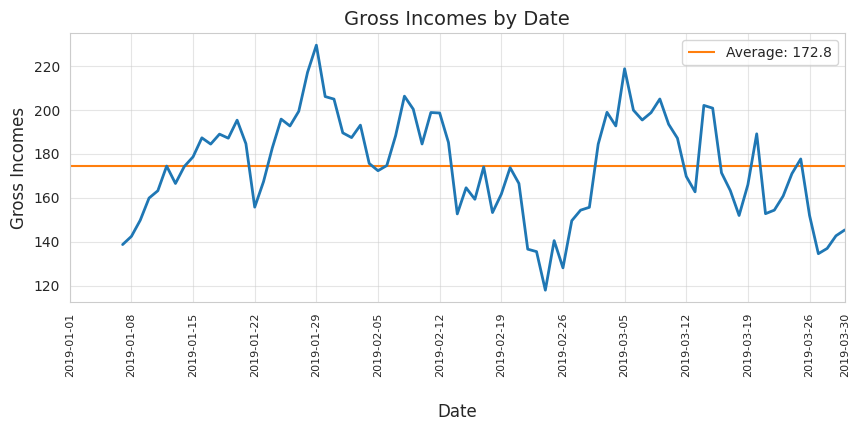

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 3.5))
plt.hlines(y=rolling_sum.mean(), xmin=dates.min(), xmax=dates.max(), colors='tab:orange',
           label=f"Average: {round(df_rolled.mean(), 2)}")
sns.lineplot(rolling_sum, linewidth=2)

plt.title("Gross Incomes by Date", fontsize=14)
plt.ylabel("Gross Incomes", fontsize=12)
plt.xlabel("\nDate", fontsize=12)
plt.xticks([rolling_sum.index[i*window].date() for i in range((len(rolling_sum)//window) + 1)] + [rolling_sum.index[-1].date()],
           rotation=90, fontsize=8)
plt.grid(alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()